# Notes on Probability and Distribution

## Example 6.1 Biased Coin Flip

In [229]:
from sympy import Eq
from sympy.stats import FiniteRV, P

# Define the sample space with each outcome's probability
sample_space = {
    ("Dollar", "Dollar"): 0.3 * 0.3,
    ("Dollar", "Pound"): 0.3 * 0.7,
    ("Pound", "Dollar"): 0.7 * 0.3,
    ("Pound", "Pound"): 0.7 * 0.7,
}

# Define the inverse mapping for X (counting "Dollar" outcomes)
inverse_X = {
    2: [("Dollar", "Dollar")],
    1: [("Dollar", "Pound"), ("Pound", "Dollar")],
    0: [("Pound", "Pound")],
}

# Use the inverse mapping to define X with weights for each count of "Dollar" outcomes
X = FiniteRV(
    "X",
    {
        2: sum(sample_space[outcome] for outcome in inverse_X[2]),
        1: sum(sample_space[outcome] for outcome in inverse_X[1]),
        0: sum(sample_space[outcome] for outcome in inverse_X[0]),
    },
)

# Step 4: Calculate and display probabilities directly using P
P(Eq(X, 2)), P(Eq(X, 1)), P(Eq(X, 0))

(0.0900000000000000, 0.420000000000000, 0.490000000000000)

Alternatively, we can represent $\displaystyle X $ as a binomial distribution:

In [183]:
from sympy import symbols, Eq
from sympy.stats import Binomial, P

dollar, pound = symbols("\\$ £")

# X is actually a binomial distribution wrt getting $.
X = Binomial("X", 2, 3 / 10)

P(Eq(X, 2)), P(Eq(X, 1)), P(Eq(X, 0))

(0.0900000000000000, 0.420000000000000, 0.490000000000000)

## 6.4 Two-dimensional Gaussian distribution:

\begin{equation*}
p( x) =0.4\mathcal{N}\left(\boldsymbol{x}\middle| \begin{bmatrix}
10\\
2
\end{bmatrix} ,\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}\right) +0.6\mathcal{N}\left(\boldsymbol{x}\middle| \begin{bmatrix}
0\\
0
\end{bmatrix} ,\begin{bmatrix}
8.4 & 2.0\\
2.0 & 1.7
\end{bmatrix}\right)
\end{equation*}

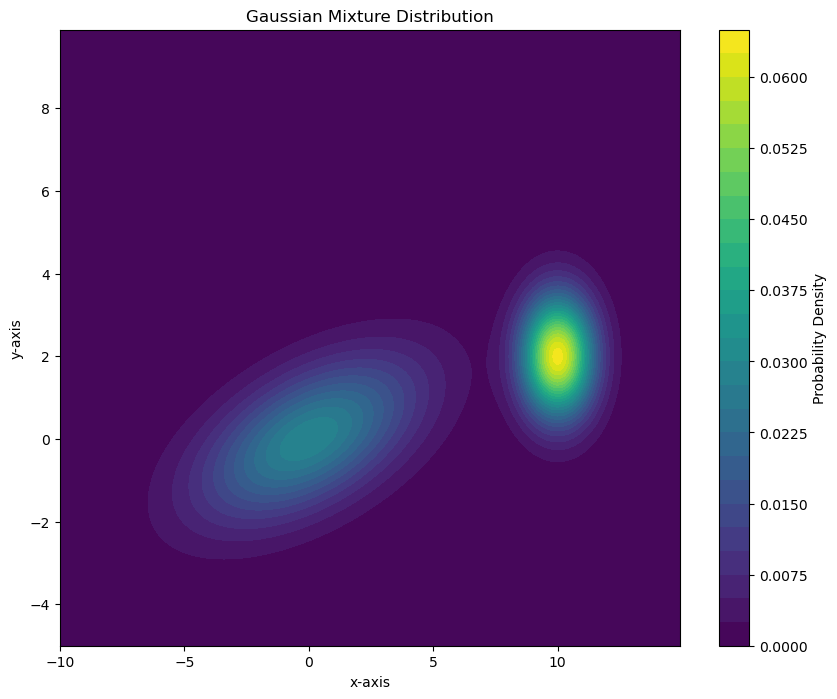

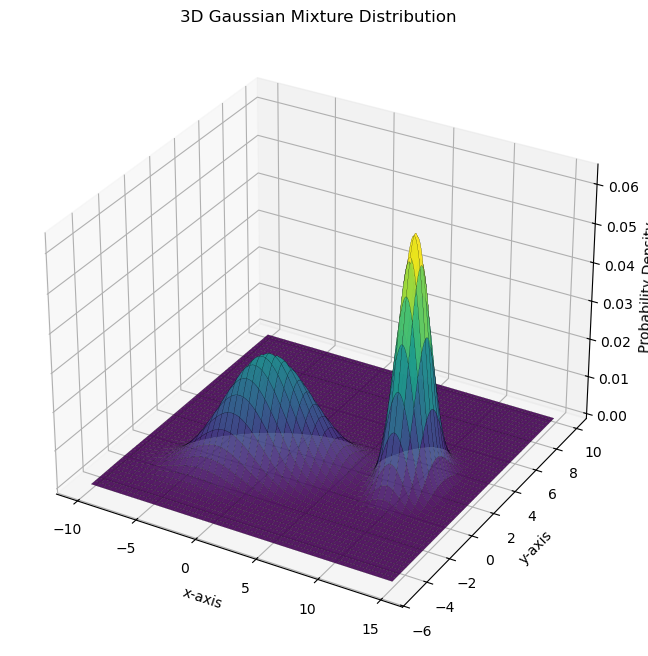

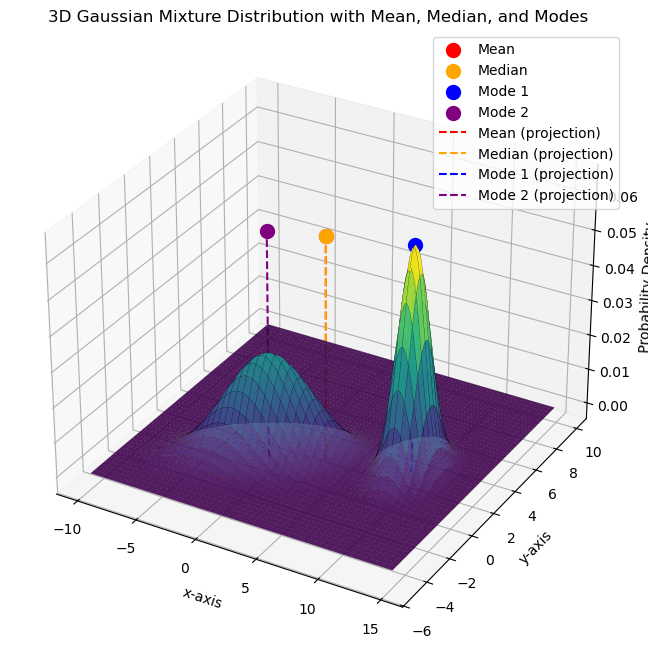

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the parameters for the Gaussian mixture model
weight1 = 0.4
weight2 = 0.6

mean1 = np.array([10, 2])
cov1 = np.array([[1, 0], [0, 1]])

mean2 = np.array([0, 0])
cov2 = np.array([[8.4, 2.0], [2.0, 1.7]])

# Create a grid of points over which to evaluate the PDF
x, y = np.mgrid[-10:15:0.1, -5:10:0.1]
pos = np.dstack((x, y))

# Calculate the PDF for each Gaussian component
rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)

pdf1 = rv1.pdf(pos) * weight1
pdf2 = rv2.pdf(pos) * weight2

# Combine the components to get the mixture PDF
pdf = pdf1 + pdf2

# Plot the distribution
plt.figure(figsize=(10, 8))
plt.contourf(x, y, pdf, levels=30, cmap="viridis")
plt.colorbar(label="Probability Density")
plt.title("Gaussian Mixture Distribution")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Plot the distribution in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, pdf, cmap="viridis", edgecolor="k", linewidth=0.1, alpha=0.9)

# Labels and title
ax.set_title("3D Gaussian Mixture Distribution")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("Probability Density")

plt.show()

# Calculate mean, median, and modes for the mixture
# For simplicity in a Gaussian mixture, we can approximate the mean of the distribution as a weighted sum of the component means.

# Calculate mean of the mixture distribution (weighted sum of means)
mixture_mean = weight1 * mean1 + weight2 * mean2

# Approximate mode as the means of the highest-weighted distribution, as modes in mixture distributions aren't simple to calculate directly
# Here, we'll take the means of each component as approximate modes.
mode1 = mean1
mode2 = mean2

# Median approximation (since exact median for Gaussian mixtures is complex, here we assume it approximates the weighted mean)
# In high-dimensional cases, mean and median can be similar due to Gaussian behavior.
mixture_median = mixture_mean

# Plot the distribution in 3D with added markers for mean, median, and modes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Surface plot of the PDF
ax.plot_surface(x, y, pdf, cmap="viridis", edgecolor="k", linewidth=0.1, alpha=0.9)

# Plot mean, median, and modes on the surface
ax.scatter(
    mixture_mean[0],
    mixture_mean[1],
    max(pdf.flatten()),
    color="red",
    s=100,
    label="Mean",
)
ax.scatter(
    mixture_median[0],
    mixture_median[1],
    max(pdf.flatten()),
    color="orange",
    s=100,
    label="Median",
)
ax.scatter(mode1[0], mode1[1], max(pdf.flatten()), color="blue", s=100, label="Mode 1")
ax.scatter(
    mode2[0], mode2[1], max(pdf.flatten()), color="purple", s=100, label="Mode 2"
)

# Projected lines on the xz and yz planes for mean, median, and modes
ax.plot(
    [mixture_mean[0], mixture_mean[0]],
    [mixture_mean[1], mixture_mean[1]],
    [0, max(pdf.flatten())],
    "r--",
    label="Mean (projection)",
)
ax.plot(
    [mixture_median[0], mixture_median[0]],
    [mixture_median[1], mixture_median[1]],
    [0, max(pdf.flatten())],
    "orange",
    linestyle="--",
    label="Median (projection)",
)
ax.plot(
    [mode1[0], mode1[0]],
    [mode1[1], mode1[1]],
    [0, max(pdf.flatten())],
    "b--",
    label="Mode 1 (projection)",
)
ax.plot(
    [mode2[0], mode2[0]],
    [mode2[1], mode2[1]],
    [0, max(pdf.flatten())],
    "purple",
    linestyle="--",
    label="Mode 2 (projection)",
)

# Labels and title
ax.set_title("3D Gaussian Mixture Distribution with Mean, Median, and Modes")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("Probability Density")
ax.legend(loc="upper right")

plt.show()